# Dataset

In [1]:
import pandas as pd 
import io
import numpy as np 
from google.colab import files
import tensorflow as tf
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv('SolarData.csv')
y = df['Efficiency'].values
X = df[['NameplateCapacity','Year','Month','Lat','Lon',
        'tavg','tmin','tmax','prcp','wdir','wspd','pres','cloudFracLow',
        'cloudFracMid','cloudFracHigh','shortWaveIn','longWaveOut','age']].values
Features = ['NameplateCapacity','Year','Month','Lat','Lon',
        'tavg','tmin','tmax','prcp','wdir','wspd','pres','cloudFracLow',
        'cloudFracMid','cloudFracHigh','shortWaveIn','longWaveOut','age']


# calculate average efficiency for each plant
IDs = np.unique(df['PlantCode'])
effAvg = np.empty(len(IDs))
lat_uniq = np.empty(len(IDs))
lon_uniq = np.empty(len(IDs))

n=0
for I in IDs:

  effAvg[n] = df.loc[df['PlantCode'] == I, 'Efficiency'].mean()
  # also get lat and lon of each plant
  lat_uniq[n] = df.loc[df['PlantCode'] == I, 'Lat'].mean()
  lon_uniq[n] = df.loc[df['PlantCode'] == I, 'Lon'].mean()

  n+=1

# plot average efficiency of all solar PV plants in dataset
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125., -65., 25., 50.])
#ax.add_feature(cfeature.STATES, linewidth=0.5) # not working with this install of cartopy for some reason
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_xticks(np.arange(-125,-65,10),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(50,25,-10), crs=ccrs.PlateCarree())

im = ax.scatter(lon_uniq,lat_uniq,s=30, zorder=15, c=effAvg,transform=ccrs.PlateCarree())
ax.set_title('Average Efficiency of Solar PV Plants in Dataset',fontsize=20)
#ax.set_title('Nameplate Capacity of Solar PV Plants in Dataset',fontsize=20)
fig.colorbar(im,fraction=0.046*0.5, pad=0.04)
plt.show()

ModuleNotFoundError: No module named 'google'

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

# Linear Regression (OLS)



In [ ]:

IDs = np.unique(df['PlantCode'])
isnana = np.isnan(X) #Remove empty values (mainly snowfall)
X[isnana]=0

# Split the data into training/testing sets
X_train = X[:-1500]
X_test = X[-1500:]

# Split the targets into training/testing sets
y_train = y[:-1500]
y_test = y[-1500:]

linreg = linear_model.LinearRegression()
linreg.fit(X,y) 
y_pred = linreg.predict(X_test)

print(linreg.score(X,y))

# R2 score 
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Calculating RMSE between target and predicted values 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Cross validation accuracy
print(cross_val_score(linreg, X, y, cv=10))

# CV average
print("CV average is", round(100*np.mean(cross_val_score(linreg, X, y, cv=10)),2),'%')

0.5102705589052872
Coefficient of determination: 0.43
0.07186110459284518
[0.62031142 0.41095595 0.33046393 0.51318255 0.573351   0.48154829
 0.42982855 0.36622327 0.41601983 0.4287184 ]
CV average is 45.71 %


In [ ]:
list(zip(Features, linreg.coef_))

[('NameplateCapacity', 0.0009522538436559248),
 ('Year', 5.8546494996432655e-06),
 ('Month', 0.0036267366482157647),
 ('Lat', -0.0008658261432345029),
 ('Lon', -0.0003538156486721376),
 ('tavg', -0.00047996053907152557),
 ('tmin', -0.000888216283463158),
 ('tmax', 0.00014518228785299686),
 ('prcp', -1.1289821337301343e-05),
 ('wdir', 2.110893949638166e-05),
 ('wspd', 0.00029550067293493404),
 ('pres', -2.2526316512683553e-06),
 ('cloudFracLow', -0.001495414371164929),
 ('cloudFracMid', -0.00028534939483679787),
 ('cloudFracHigh', -0.00020087308306847727),
 ('shortWaveIn', 0.0007667927669010729),
 ('longWaveOut', -7.627655233078537e-05),
 ('age', 5.4050314109151035e-05)]

In [ ]:
pval = stats.coef_pval(linreg, X, y)

# Significant features
list(zip(Features, pval))

[('NameplateCapacity', 0.9504010631662525),
 ('Year', 0.0),
 ('Month', 0.0006773947795886137),
 ('Lat', 0.0),
 ('Lon', 8.159241176919352e-06),
 ('tavg', 0.0),
 ('tmin', 0.27072115421090115),
 ('tmax', 1.1802269701544077e-06),
 ('prcp', 0.475737038249854),
 ('wdir', 0.3551270315329478),
 ('wspd', 3.63476785718575e-05),
 ('pres', 0.09599104160254157),
 ('cloudFracLow', 0.16495118978219048),
 ('cloudFracMid', 0.0),
 ('cloudFracHigh', 0.019614539743967985),
 ('shortWaveIn', 0.0015203264873671074),
 ('longWaveOut', 0.0),
 ('age', 0.005271618123669164)]

In [ ]:
# Stat summary
# stats.summary(linreg, X, y, Features)

In [ ]:
from sklearn.model_selection import KFold
############## Check for overfitting #####################
# Perform 10-fold crossvalidation w/ splits based on plant IDs

#Splits data into 10 subsets based on Plant IDs
kf = KFold(n_splits=10)
AccTank = np.zeros([10,2])
m=0
for train_index, test_index in kf.split(IDs):
    for j in range(len(train_index)):
        if j == 0:
            train_ind = np.asarray(np.where(df['PlantCode'] == IDs[j]))
        else:
            train_ind = np.append(train_ind,np.asarray(np.where(df['PlantCode'] == IDs[j])))
    for k in range(len(test_index)):
        if k == 0:
            test_ind = np.asarray(np.where(df['PlantCode'] == IDs[k]))
        else:
            test_ind = np.append(test_ind,np.asarray(np.where(df['PlantCode'] == IDs[k])))
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]

    #Perform logistic regression on training data
    linfitCV = linear_model.LinearRegression().fit(X_train,y_train)

    #Check accuracy of model with testing data
    AccTank[m,0] = linfitCV.score(X_test,y_test)
    AccTank[m,1] = len(y_test)

    #Report accuracy of each subset
    print('Test ',m,' Accuracy = ',AccTank[m,0])
    m=m+1

#Overall performance
TotalCorrect = np.sum(AccTank[:,0]*AccTank[:,1])
TotalTested = np.sum(AccTank[:,1])
TotalAccuracy = TotalCorrect/TotalTested
print('Total Accuracy = ', TotalAccuracy)

ValueError: ignored

# Linear Regression (Ridge)

In [ ]:
ridge = linear_model.Ridge(solver='saga') 
ridge.fit(X_train,y_train)

y_pred2 = ridge.predict(X_test) 

print(ridge.score(X,y))

# R2 score 
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred2))

# Calculating RMSE between target and predicted values 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

#Cross validation accuracy
print(cross_val_score(ridge, X, y, cv=10))

# CV average
print("CV average is", round(100*np.mean(cross_val_score(ridge, X, y, cv=10)),2),'%')


ValueError: ignored

In [ ]:
pval = stats.coef_pval(ridge, X, y)

pindex = pval<0.05
fts = np.array(Features)[pindex[1:19]]

# Significant features
list(zip(fts, pval[pindex]))


[('NameplateCapacity', 0.0),
 ('Year', 0.0),
 ('Month', 0.0),
 ('Lon', 0.0),
 ('tavg', 0.014840887345223264),
 ('tmin', 1.2455673330524775e-06),
 ('wdir', 1.0657478011211197e-07),
 ('wspd', 0.007111198377168337),
 ('pres', 0.015679801599580934),
 ('cloudFracLow', 0.0),
 ('cloudFracMid', 0.0019106084250846145),
 ('cloudFracHigh', 3.884549458321729e-06),
 ('shortWaveIn', 0.0),
 ('longWaveOut', 0.000611136199222706),
 ('age', 4.1852551202481436e-08)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


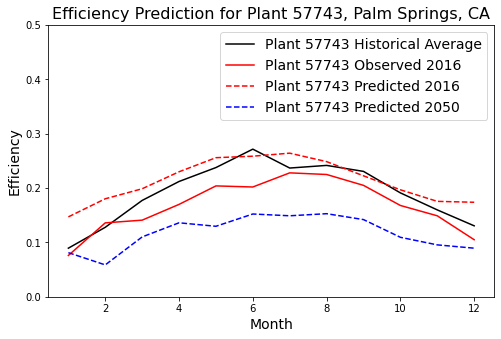

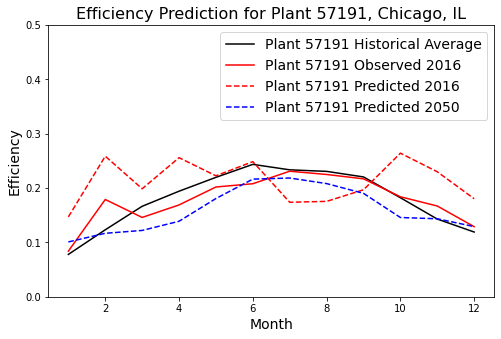

In [ ]:
# plot observed and predicted monthly efficiencies at plants 57743 and 57191 during 2016
ind57743 = np.asarray(np.where(df['PlantCode'] == 57743))
ind57191 = np.asarray(np.where(df['PlantCode'] == 57191))
ind2016 = np.asarray(np.where(df['Year'] == 2016))
eff57743 = df[['Efficiency','Month']].values[np.intersect1d(ind57743, ind2016)]
eff57743 = eff57743[np.argsort(eff57743[:, 1])]
eff57743 = eff57743[:,0]
eff57191 = df[['Efficiency','Month']].values[np.intersect1d(ind57191, ind2016)]
eff57191 = eff57191[np.argsort(eff57191[:, 1])]
eff57191 = eff57191[:,0]

# also get annual climatology for each plant
clim57743 = np.empty(12)
clim57191 = np.empty(12)
df57743 = df[['Efficiency','Month']].values[ind57743]
df57191 = df[['Efficiency','Month']].values[ind57191]
for i in range(12):

  clim57743[i] = np.mean(df57743[0,:,0][df57743[0,:,1]==float(i+1)])
  clim57191[i] = np.mean(df57191[0,:,0][df57191[0,:,1]==float(i+1)])


df.dropna(subset = ["wspd"], inplace=True)
df.dropna(subset = ["shortWaveIn"], inplace=True)
X2 = df[['NameplateCapacity','Year','Month','Lat','Lon',
        'tavg','tmin','tmax','wspd','cloudFracLow','shortWaveIn']].values


train_ind2 = train_ind[train_ind!=ind57743] # make sure that data from these two plants is not in training data
train_ind2 = train_ind2[train_ind2!=ind57191]

X_train = X2[train_ind2]
X_train = np.reshape(X_train,(12650,11))

y_train = y[train_ind2]
y_train = np.reshape(y_train,(12650))

ols = linear_model.LinearRegression().fit(X_train,y_train)#linear_model.Ridge(solver='saga') 
ols.fit(X_train,y_train)


X57743 = X2[np.intersect1d(ind57743, ind2016)]
X57743 = X57743[np.argsort(X57743[:, 2])]
pred57743 = ols.predict(X57743)
X57191 = X2[np.intersect1d(ind57191, ind2016)]
X57191 = X57743[np.argsort(X57191[:, 2])]
pred57191 = ols.predict(X57191)

# predict plant efficiencies during climate change
df2 = pd.read_csv('/content/CC_data.csv')
XCC = df2[['NameplateCapacity','Year','Month','Lat','Lon',
        'tavg','tmin','tmax','wspd','cloudFracLow','shortWaveIn']].values

CC57743 = ols.predict(XCC[0:12,:])
CC57191 = ols.predict(XCC[12:,:])

fig = plt.figure(figsize=(8,5))

plt.plot(np.arange(1,13),clim57743,c='k',label="Plant 57743 Historical Average")
plt.plot(np.arange(1,13),eff57743,c='r',label="Plant 57743 Observed 2016")
plt.plot(np.arange(1,13),pred57743,c='r',linestyle="dashed",label="Plant 57743 Predicted 2016")
plt.plot(np.arange(1,13),CC57743,c='b',linestyle="dashed",label="Plant 57743 Predicted 2050")
plt.ylim((0.,0.5))
plt.xlabel('Month',size=14)
plt.ylabel('Efficiency',size=14)
plt.legend(fontsize=14)
plt.title('Efficiency Prediction for Plant 57743, Palm Springs, CA',fontsize=16)
plt.show()


fig = plt.figure(figsize=(8,5))

plt.plot(np.arange(1,13),clim57191,c='k',label="Plant 57191 Historical Average")
plt.plot(np.arange(1,13),eff57191,c='r',label="Plant 57191 Observed 2016")
plt.plot(np.arange(1,13),pred57191,c='r',linestyle="dashed",label="Plant 57191 Predicted 2016")
plt.plot(np.arange(1,13),CC57191,c='b',linestyle="dashed",label="Plant 57191 Predicted 2050")
plt.ylim((0.,0.5))
plt.xlabel('Month',size=14)
plt.ylabel('Efficiency',size=14)
plt.legend(fontsize=14)
plt.title('Efficiency Prediction for Plant 57191, Chicago, IL',fontsize=16)
plt.show()






In [ ]:
#

# Linear Regression (Lasso)


In [ ]:
lasso = linear_model.Lasso(alpha=0.01) 
lasso.fit(X_train,y_train)

y_pred3 = lasso.predict(X_test) 

print(lasso.score(X,y))

# R2 score 
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred3))

# Calculating RMSE between target and predicted values 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

#Cross validation accuracy
print(cross_val_score(lasso, X, y, cv=10))

# CV average
print("CV average is", round(100*np.mean(cross_val_score(lasso, X, y, cv=10)),2),'%')

0.5054579507102146
Coefficient of determination: 0.41
0.0729419903991591
[0.60491164 0.42021841 0.35914576 0.50972117 0.58391241 0.48590844
 0.47980414 0.37945639 0.43963805 0.42422596]
CV average is 46.87 %


In [ ]:
pval = stats.coef_pval(lasso, X, y)

pindex = pval<0.05
fts = np.array(Features)[pindex[1:19]]

# Significant features
list(zip(fts, pval[pindex]))

[('NameplateCapacity', 0.0),
 ('Month', 0.0),
 ('Lon', 0.0),
 ('tmin', 0.0006132830451337501),
 ('wdir', 3.3306690738754696e-15),
 ('pres', 0.007614949840543339),
 ('cloudFracLow', 0.0),
 ('cloudFracHigh', 3.3671092580789264e-08),
 ('shortWaveIn', 0.0),
 ('age', 4.285935146786102e-07)]

# Linear Regression (Elastic Net)

In [ ]:
elastic_net = linear_model.ElasticNet()
elastic_net.fit(X_train, y_train)

y_pred4 = elastic_net.predict(X_test)

print(elastic_net.score(X,y))

# R2 score 
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred4))

# Calculating RMSE between target and predicted values 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

# Cross validation accuracy
print(cross_val_score(elastic_net, X, y, cv=10))

# 10-fold Cross Validation average
print("CV average is", round(100*np.mean(cross_val_score(elastic_net, X, y, cv=10)),2),'%')

0.4460140272838452
Coefficient of determination: 0.40
0.07405225786279275
[0.5480093  0.37711677 0.32784219 0.47822478 0.53658085 0.42022882
 0.35762587 0.30748796 0.51075337 0.39647927]
CV average is 42.6 %


In [ ]:
pval = stats.coef_pval(elastic_net, X, y)

pindex = pval<0.05
fts = np.array(Features)[pindex[1:19]]

# Significant features
list(zip(fts, pval[pindex]))

[('wdir', 0.008660090679936117), ('shortWaveIn', 0.0)]

# Logistic Regression

In [ ]:
import pandas as pd 
import numpy as np
from scipy.stats import norm
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

def logit_pvalue(model,x):
    """ Calculate p-values for skikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x: matrix on which the model was fit
    This function uses asymptotics for maximum likelihood estimates.
    """
    p = model.predict_proba(x) #Probability for each outcome for each sample [n-samples,2]
    n = len(p)
    m = len(model.coef_[0])+1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x),0,1, axis = 1))
    ans = np.zeros((m,m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i,:]), x_full[i,:])*p[i,1]*p[i,0]
    vcov = np.linalg.inv(np.matrix(ans)) # Compute Fisher-information matrix
    se = np.sqrt(np.diag(vcov))
    t = coefs/se
    p = (1-norm.cdf(abs(t)))*2 #compute p values
    return p

############## Variable Setup ######################
df = pd.read_csv('SolarData.csv') #import data
y_num = df['Efficiency'].values
X = df[['NameplateCapacity','Year','Month','Lat','Lon',
        'tavg','tmin','tmax','prcp','wdir','wspd','pres','cloudFracLow',
        'cloudFracMid','cloudFracHigh','shortWaveIn','longWaveOut','age']].values
Features = ['NameplateCapacity','Year','Month','Lat','Lon',
        'tavg','tmin','tmax','prcp','wdir','wspd','pres','cloudFracLow',
        'cloudFracMid','cloudFracHigh','shortWaveIn','longWaveOut','age']
IDs = np.unique(df['PlantCode'])
isnana = np.isnan(X) #Remove empty values (mainly snowfall)
X[isnana]=0

# Change efficieny into binary variable
y = np.zeros([len(y_num),])
for i in range(len(y)):
    if y_num[i] > 0.20: #Picked 20% efficiency as bound, arbitrary choice, we can change this...
        y[i] = 1
    else:
        y[i] = 0
        
        
# Perform logistic regression
# Each feature variable converted to binary variable
# Optimized using L2-norm for penalization and saga algorithm (https://arxiv.org/abs/1407.0202)
logfit = LogisticRegression(multi_class='auto',C=1e30,penalty='l2',tol=0.001,solver='saga',max_iter=10000).fit(X,y)


########### Feature Significance ###############
# Get predicted p-values for each feature
P = logfit.predict_proba(X)
p_vals = logit_pvalue(logfit,X)

# Check which feature are significant
# Alpha = 0.05
i=0
for i in range(len(p_vals)-1):
    if p_vals[i+1] < 0.05:
        print(Features[i],' is significant: p = ',p_vals[i+1])

NameplateCapacity  is significant: p =  0.0
Month  is significant: p =  0.0
Lat  is significant: p =  0.007532353979484263
Lon  is significant: p =  3.086420008457935e-11
wdir  is significant: p =  0.0025429830230812023
cloudFracLow  is significant: p =  0.0
cloudFracMid  is significant: p =  0.002503629237987637
shortWaveIn  is significant: p =  0.0
longWaveOut  is significant: p =  0.037694164390838614
age  is significant: p =  0.030887565184010368


In [ ]:
############## Check for overfitting #####################
# Perform 10-fold crossvalidation w/ splits based on plant IDs

#Splits data into 10 subsets based on Plant IDs
kf = KFold(n_splits=10)
AccTank = np.zeros([10,2])
m=0
for train_index, test_index in kf.split(IDs):
    for j in range(len(train_index)):
        if j == 0:
            train_ind = np.asarray(np.where(df['PlantCode'] == IDs[j]))
        else:
            train_ind = np.append(train_ind,np.asarray(np.where(df['PlantCode'] == IDs[j])))
    for k in range(len(test_index)):
        if k == 0:
            test_ind = np.asarray(np.where(df['PlantCode'] == IDs[k]))
        else:
            test_ind = np.append(test_ind,np.asarray(np.where(df['PlantCode'] == IDs[k])))
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]

    #Perform logistic regression on training data
    logfitCV = LogisticRegression(multi_class='auto',C=1e30,penalty='l2',tol=0.001,solver='saga',max_iter=10000).fit(X_train,y_train)

    #Check accuracy of model with testing data
    AccTank[m,0] = logfitCV.score(X_test,y_test)
    AccTank[m,1] = len(y_test)

    #Report accuracy of each subset
    print('Test ',m,' Accuracy = ',AccTank[m,0])
    m=m+1

#Overall performance
TotalCorrect = np.sum(AccTank[:,0]*AccTank[:,1])
TotalTested = np.sum(AccTank[:,1])
TotalAccuracy = TotalCorrect/TotalTested
print('Total Accuracy = ', TotalAccuracy)

Test  0  Accuracy =  0.7944819819819819
Test  1  Accuracy =  0.7944819819819819
Test  2  Accuracy =  0.7944819819819819
Test  3  Accuracy =  0.7899210686095932
Test  4  Accuracy =  0.7899210686095932
Test  5  Accuracy =  0.7899210686095932
Test  6  Accuracy =  0.7899210686095932
Test  7  Accuracy =  0.7899210686095932
Test  8  Accuracy =  0.7899210686095932
Test  9  Accuracy =  0.7899210686095932
Total Accuracy =  0.7913626386664294
